# Exemple Chollet 01 - Petit ConvNet

Source : F. Chollet, L’apprentissage profond avec Python. Saint-Cyr-sur-Loire: Machinelearning.fr, 2020. p164

In [1]:
import keras
keras.__version__

'2.14.0'

In [2]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

## Data

> Todo : modifier le répertoire de cache des données

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 2s 0us/step


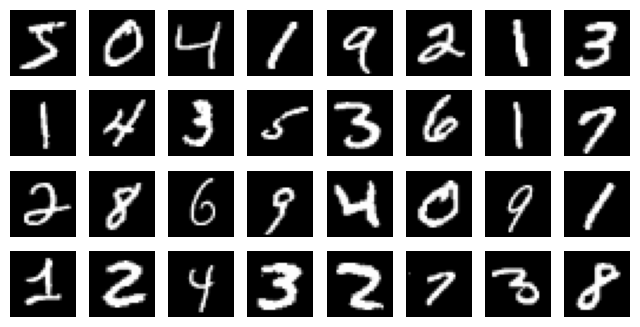

In [41]:
nrows = 4
ncols = 8

fig = plt.gcf()
fig.set_size_inches(ncols * 1, nrows * 1)

for i in range(nrows * ncols):
	# Set up subplot; subplot indices start at 1
	sp = plt.subplot(nrows, ncols, i + 1)
	sp.axis('Off') # Don't show axes (or gridlines)
	plt.imshow(train_images[i], "gray")

plt.show()

## Modèle

In [47]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 576)              

In [25]:
epochs=10
batch_size=64

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, 
                    epochs=epochs, batch_size=batch_size,
                    validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0191 - val_accuracy: 0.9967
Epoch 2/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0168 - val_accuracy: 0.9969
Epoch 3/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0159 - val_accuracy: 0.9976
Epoch 4/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0206 - val_accuracy: 0.9966
Epoch 5/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0168 - val_accuracy: 0.9971
Epoch 6/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0314 - val_accuracy: 0.9957
Epoch 7/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0268 - val_accuracy: 0.9962
Epoch 

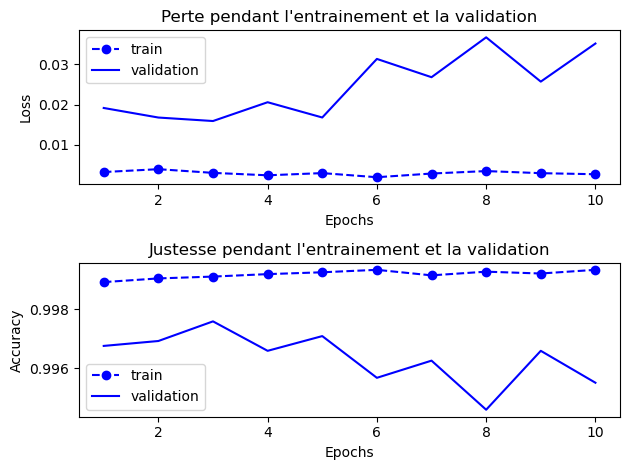

In [30]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1)

ax1 = plt.subplot(2, 1, 1)
ax1.plot(epochs, loss_values, "b--o", label="train")
ax1.plot(epochs, val_loss_values, "b", label="validation")
ax1.set_title("Perte pendant l'entrainement et la validation")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2 = plt.subplot(2, 1, 2)
ax2.plot(epochs, accuracy_values, "b--o", label="train")
ax2.plot(epochs, val_accuracy_values, "b", label="validation")
ax2.set_title("Justesse pendant l'entrainement et la validation")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

plt.tight_layout()
plt.show()

In [27]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0986 - accuracy: 0.9915


[0.09855205565690994, 0.9915000200271606]